<a href="https://colab.research.google.com/github/Singati2/AI_Science_Medicine/blob/main/Copy_of_Project_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage
import skimage.io as skio
from scipy import signal
from torchvision import transforms
import requests
from torchsummary import summary

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
urllib.request.urlretrieve('https://www.hhmi.org/sites/default/files/News/2010/cowman_goldberg1%5B1%5D.jpg?text=Slide%200')



('/tmp/tmpklvgaohb', <http.client.HTTPMessage at 0x7f407e8fe500>)

In [ ]:
im

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [ ]:
im = imread('https://www.hhmi.org/sites/default/files/News/2010/cowman_goldberg1%5B1%5D.jpg?text=Slide%200')

<ipython-input-42-67f8b1e3ddfe>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imread('https://www.hhmi.org/sites/default/files/News/2010/cowman_goldberg1%5B1%5D.jpg?text=Slide%200')


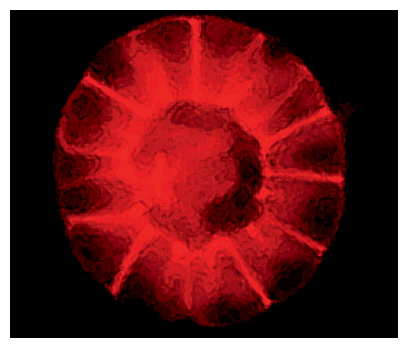

In [ ]:
plot(im)

### Resize Image

In [ ]:
im.shape

(551, 650, 3)

In [ ]:
height = 150
width = 150

im_new = resize(im,(height,width))

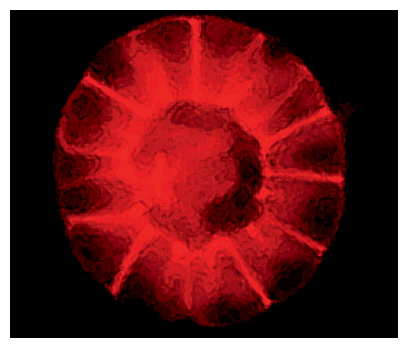

In [ ]:
plot(im)

### Show RGB Channels

In [ ]:
im = imread('https://www.hhmi.org/sites/default/files/News/2010/cowman_goldberg1%5B1%5D.jpg?text=Slide%200')

<ipython-input-16-67f8b1e3ddfe>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imread('https://www.hhmi.org/sites/default/files/News/2010/cowman_goldberg1%5B1%5D.jpg?text=Slide%200')


In [ ]:
im.shape

(551, 650, 3)

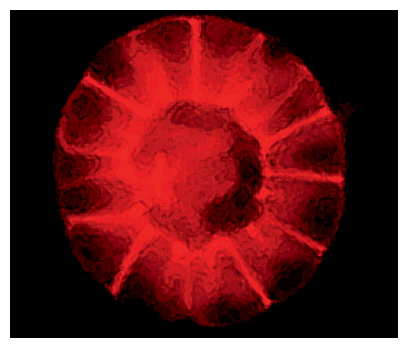

In [ ]:
plot(im)

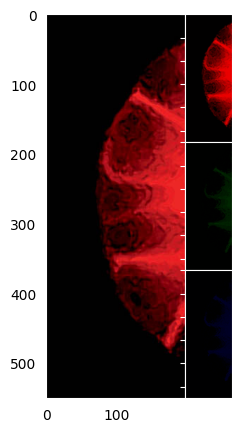

In [ ]:
fig = plt.figure()
ax = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8])
ax.imshow_rgb(im[:,:200,0],im[:,:200,1],im[:,:200,2]);

In [ ]:
im.shape

(551, 650, 3)

In [ ]:
red   = im[:,:,0]
green = im[:,:,0]
blue  = im[:,:,0]

blank = np.zeros_like(red)

In [ ]:
blank.shape

(551, 650)

In [ ]:
red.shape

(551, 650)

In [ ]:
#blank = np.zeros((red.shape[0],red.shape[1]))

In [ ]:
blank.shape

(551, 650)

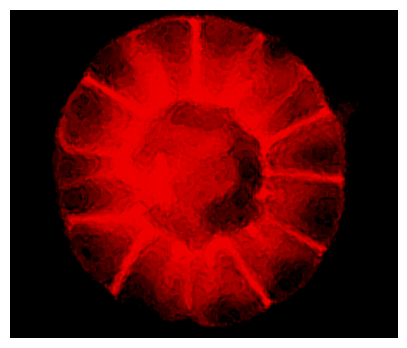

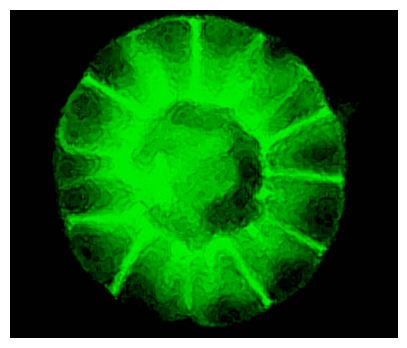

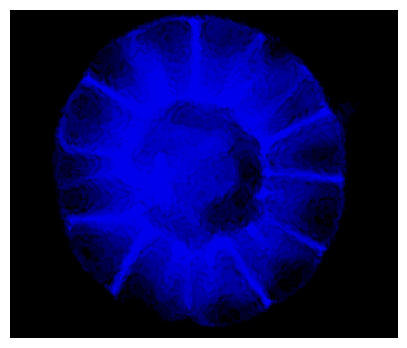

In [ ]:
plot(np.stack([red,blank,blank],-1))
plot(np.stack([blank,blue,blank],-1))
plot(np.stack([blank,blank,green],-1))

## Alexnet

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Select GPU if available

In [ ]:
net = alexnet(pretrained=True).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 50.3MB/s]


In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(100),
   transforms.CenterCrop(90),
   transforms.ToTensor(),
   normalize
])

In [ ]:
im = skio.imread('https://www.hhmi.org/sites/default/files/News/2010/cowman_goldberg1%5B1%5D.jpg?text=Slide%200')

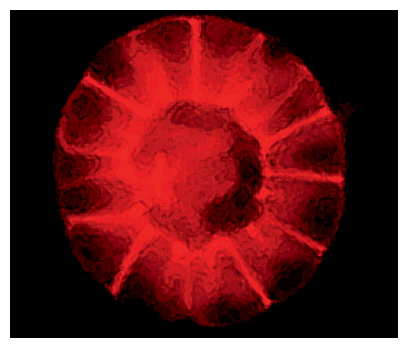

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)

In [ ]:
img_tensor = img_tensor.unsqueeze_(0)

In [ ]:
img_tensor.shape

torch.Size([1, 3, 90, 90])

In [ ]:
img_variable = torch.tensor(img_tensor).to(device)

<ipython-input-35-a2a84f990a43>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).to(device)


In [ ]:
img_variable.shape

torch.Size([1, 3, 90, 90])

In [ ]:
%%timeit
out = net(img_variable)

28.7 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
out = net(img_variable)

In [ ]:
out.shape

torch.Size([1, 1000])

In [ ]:
out

tensor([[-6.8882e+00,  7.0330e+00, -5.6163e+00, -7.0103e+00, -3.0244e+00,
         -5.1156e+00, -6.2615e+00,  2.7090e+00,  2.8567e+00, -5.3547e+00,
         -2.4849e+00, -9.0959e+00, -9.9629e+00, -1.0063e+01, -7.2920e+00,
          3.8896e+00, -3.7995e-01, -5.7013e+00, -3.3421e-01, -1.1187e+01,
         -1.0835e+01, -1.1387e+01, -6.9646e+00, -4.8210e+00, -1.2119e+01,
         -4.5371e+00, -5.6845e+00, -5.8969e+00,  3.0010e+00, -2.0698e+00,
         -4.7393e+00, -2.4077e+00,  2.8153e+00, -4.3004e+00,  1.2513e+01,
         -5.2125e+00,  5.4962e+00, -6.0920e+00, -1.0372e+01,  2.9006e-01,
         -5.5814e+00, -1.1911e+01, -1.1356e+01, -8.6155e+00, -1.2183e+01,
         -5.0058e+00, -1.7365e+00, -7.9876e+00, -5.1270e+00, -4.1317e+00,
         -3.9366e+00,  8.0640e+00, -9.5055e+00, -4.5352e+00, -1.7669e+00,
         -1.1270e+01,  2.5407e+00, -9.5316e+00, -6.9176e+00, -6.1479e+00,
          7.7024e-01, -7.0352e+00, -6.4424e+00,  2.4628e+00, -1.0364e+01,
         -4.9131e+00, -1.0718e+01, -4.

In [ ]:
label_index = out.cpu().data.numpy().argmax()

In [ ]:
label_index

107

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [ ]:
labels_url = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'
labels = {int(key):value for (key, value) in requests.get(labels_url).json().items()}

In [ ]:
print(labels[label_index])

jellyfish


In [ ]:
for i in range(10):
    print(labels[top_list[i]])

jellyfish
feather boa, boa
jack-o'-lantern
velvet
drumstick
stage
torch
leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea
mask
altar


In [ ]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(net, (3, 100, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 24, 24]          23,296
              ReLU-2           [-1, 64, 24, 24]               0
         MaxPool2d-3           [-1, 64, 11, 11]               0
            Conv2d-4          [-1, 192, 11, 11]         307,392
              ReLU-5          [-1, 192, 11, 11]               0
         MaxPool2d-6            [-1, 192, 5, 5]               0
            Conv2d-7            [-1, 384, 5, 5]         663,936
              ReLU-8            [-1, 384, 5, 5]               0
            Conv2d-9            [-1, 256, 5, 5]         884,992
             ReLU-10            [-1, 256, 5, 5]               0
           Conv2d-11            [-1, 256, 5, 5]         590,080
             ReLU-12            [-1, 256, 5, 5]               0
        MaxPool2d-13            [-1, 256, 2, 2]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

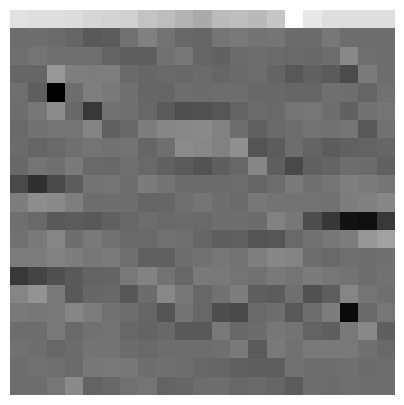

In [ ]:
plot(out[0,10,:,:])

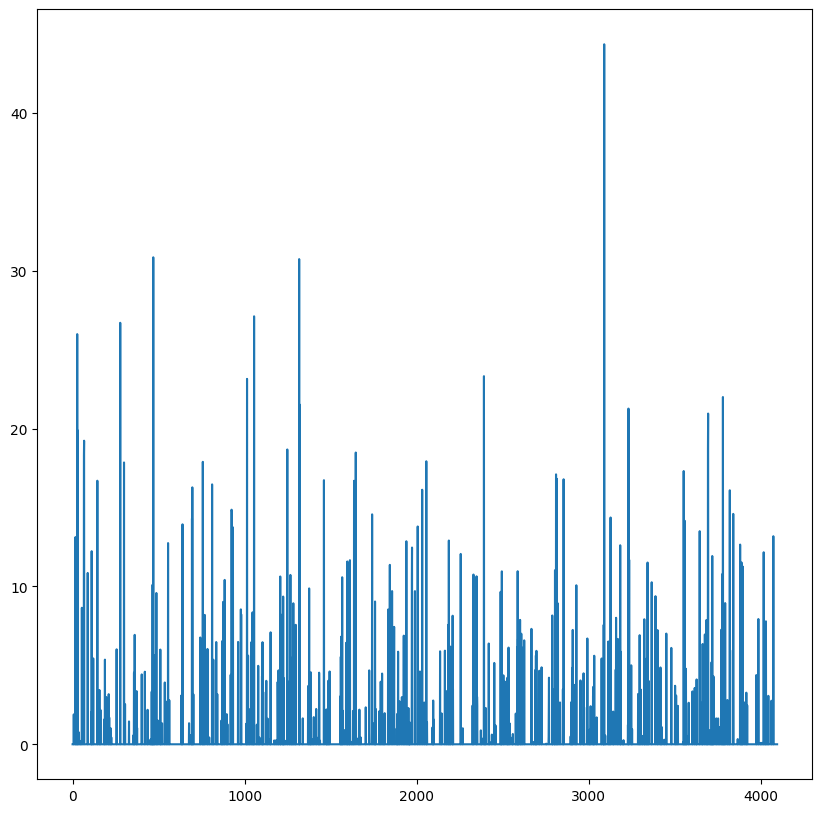

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

In [ ]:
out.shape

(1, 64, 21, 21)

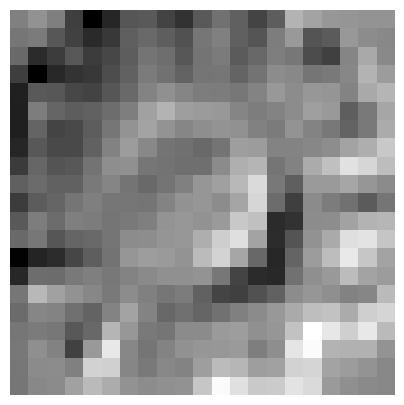

In [ ]:
plot(out[0,0,:,:])

In [ ]:
img_variable.shape

torch.Size([1, 3, 90, 90])

In [ ]:
3*224*224

150528

In [ ]:
64*55*55

193600

In [ ]:
out = np.squeeze(out)

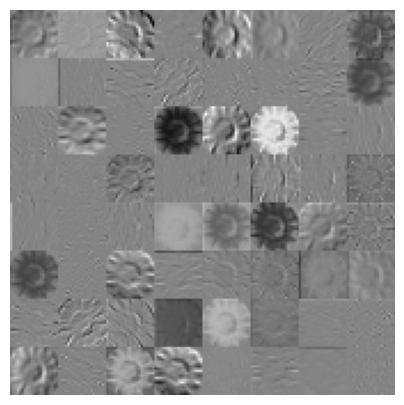

In [ ]:
plot(montage(out))

<ipython-input-810-cf30128e64a9>:1: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plot(scale(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))


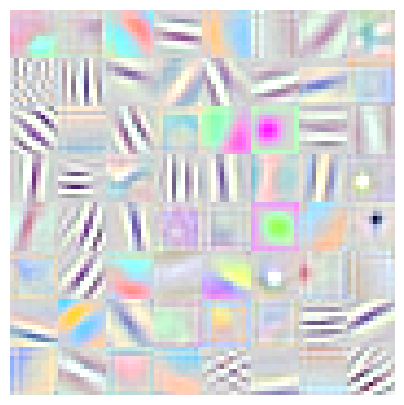

In [ ]:
plot(scale(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))

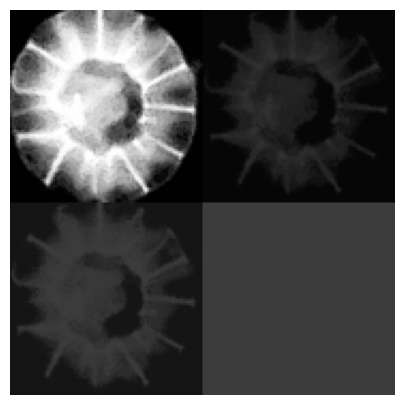

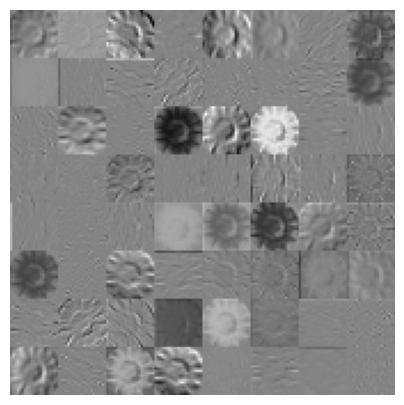

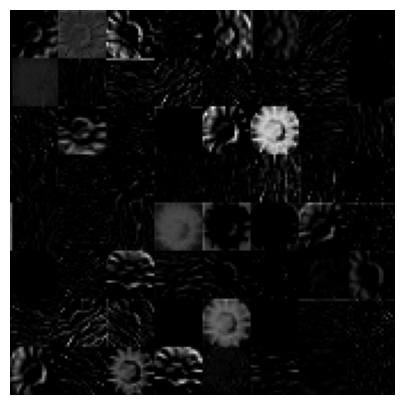

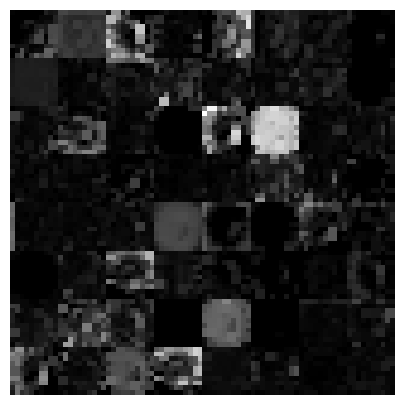

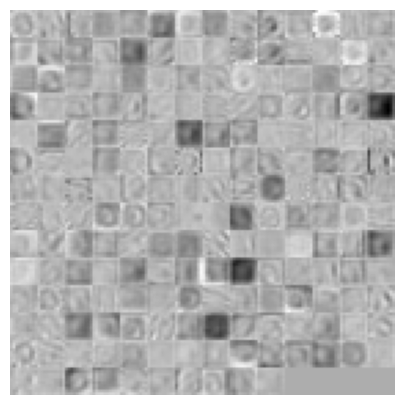

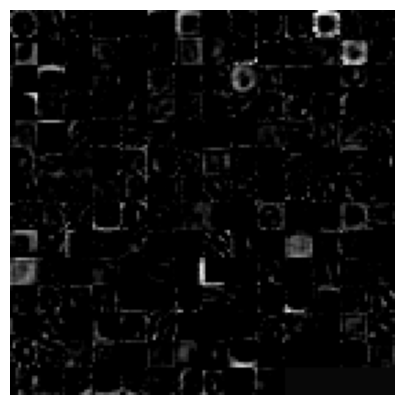

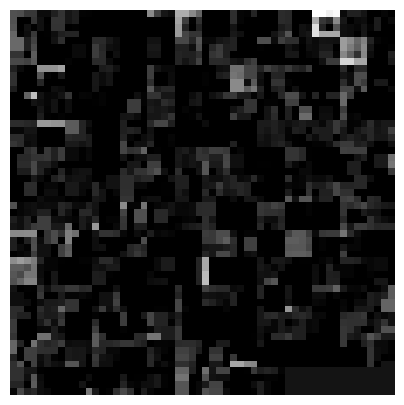

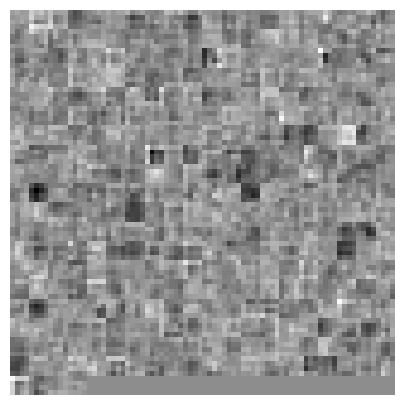

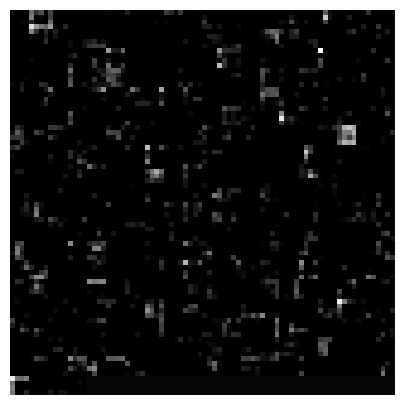

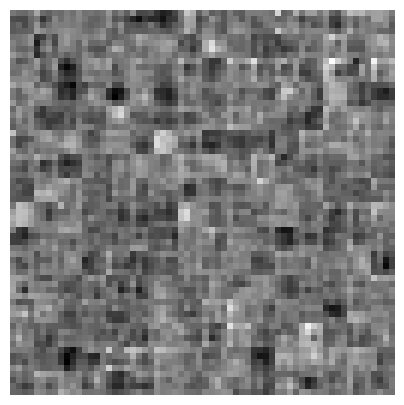

In [ ]:
for i in range(10):
    plot(montage(np.squeeze(net.features[0:i](img_variable).cpu().detach().numpy())))

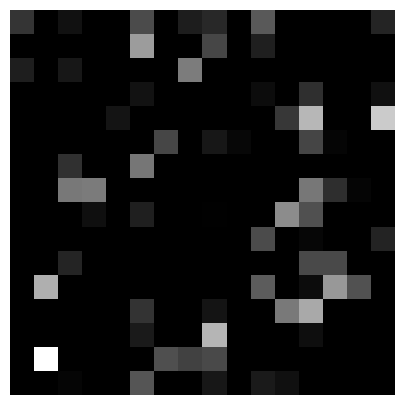

In [ ]:
plot(montage(np.squeeze(net.avgpool(net.features[0:13](img_variable)).cpu().detach().numpy())))

In [ ]:
net.features[0:13](img_variable).cpu().detach().numpy().shape

(1, 256, 1, 1)

In [ ]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
net.avgpool(net.features[0:13](img_variable)).shape

torch.Size([1, 256, 6, 6])

In [ ]:
net.avgpool(net.features[0:13](img_variable)).flatten().shape[0]

9216

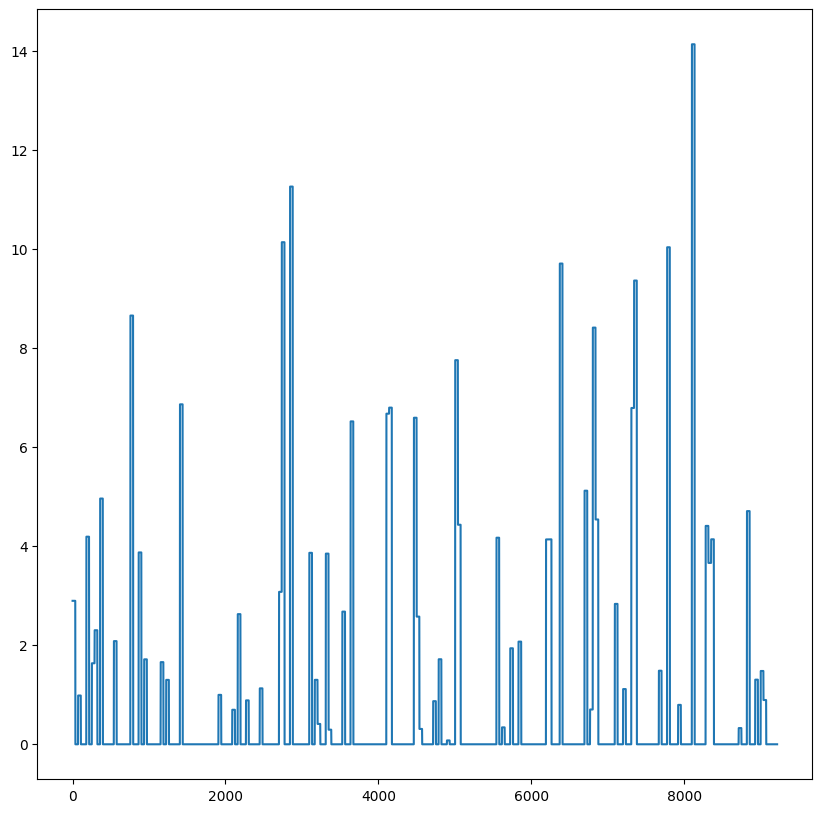

In [ ]:
plt.plot(np.arange(9216),net.avgpool(net.features[0:13](img_variable)).flatten().cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
9216 / (3*224*224) # percentage of numbers left, vs original pixels

0.061224489795918366

In [ ]:
net.classifier[0](net.avgpool(net.features[0:13](img_variable)).flatten()).shape

torch.Size([9216])

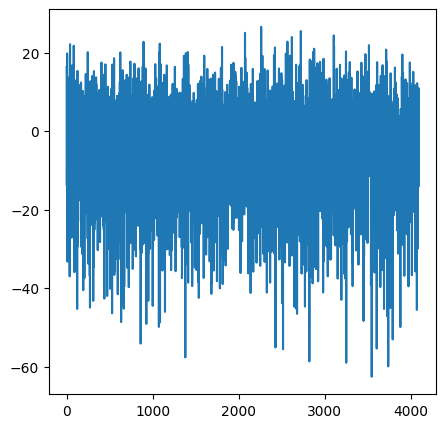

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:2](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(5, 5)

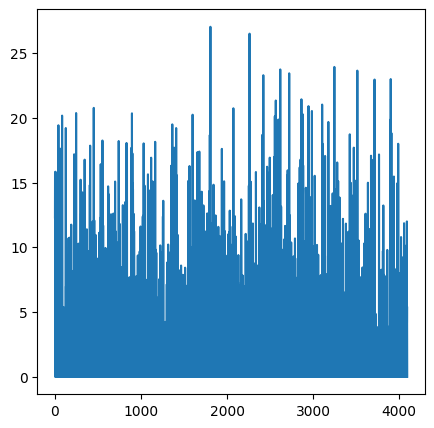

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:3](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(5, 5)

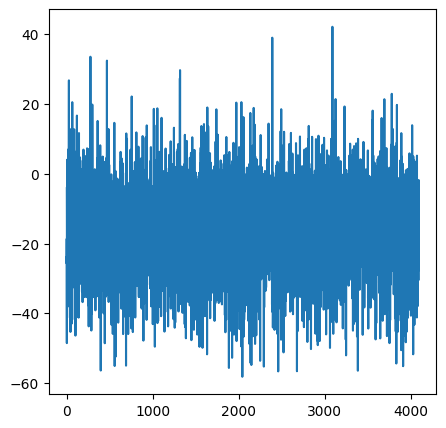

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:5](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(5, 5)

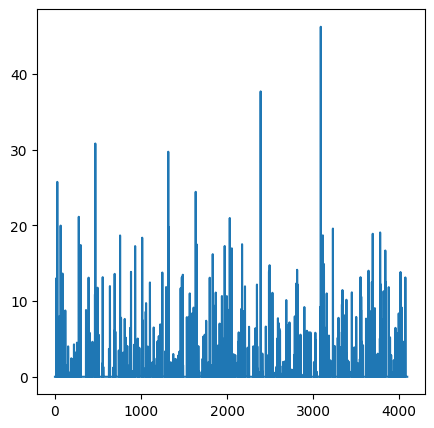

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(5, 5)

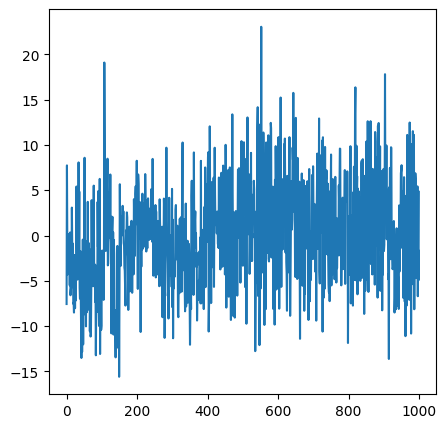

In [ ]:
plt.plot(np.arange(1000),net.classifier[0:7](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(5, 5)

In [ ]:
out = net.classifier[0:7](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy()

In [ ]:
def softmax(x):

    s = np.exp(x)

    s = s / np.sum(s)

    return s

In [ ]:
out = softmax(out)

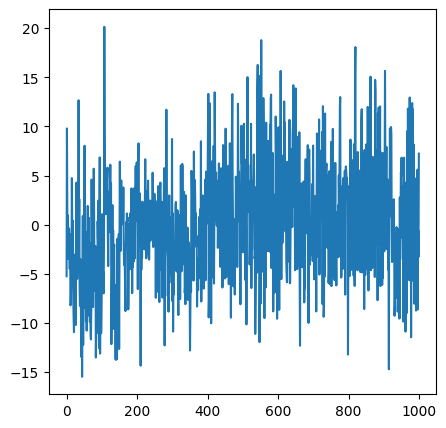

In [ ]:
plt.plot(np.arange(1000),out)
fig = plt.gcf()
fig.set_size_inches(5, 5)

In [ ]:
label_index = out.argmax()

In [ ]:
label_index

107

In [ ]:
top_list = np.flip(np.argsort(out))[0:15]

In [ ]:
top_list

array([107, 552, 819, 542, 903, 607, 818, 546, 862, 513, 875, 643, 541,
       650, 876])

In [ ]:
for i in range(10):
    print(labels[top_list[i]])

jellyfish
feather boa, boa
stage
drumstick
wig
jack-o'-lantern
spotlight, spot
electric guitar
torch
cornet, horn, trumpet, trump


## Alexnet Custom

Two possible ways to create your dataset: (1) Make one with your own with your camera/phone or (2) Build one with Image Search (Google/Bing)

The idea is to have (at least) two categories for which you will train an inference model. You will then present data from your reserved validation set to evaluate your models ability to distinguish the two categories. For example, pick any living object like ants and then collect photos with and without ants in the pictures. You will then put these pictures on your google drive and run a classification model just like with flowers 102.

The more photos you collect the better your model will be. You must have at least 50 photographs for each of your two categories. (This should not take a long time.)

Note you must put around 20% of your images into the valid folder.

Example data folders here: https://drive.google.com/drive/folders/1Je_gRF8RnhszAAbQhw2IzqM2_7byPVtL?usp=sharing

Example Ideas:

Ex1 Camera: Ant finder Close up of ground/floor with ants in photo vs Close up photo with no ants

Ex2 Camera: Palm tree with coconuts vs Palm tree with dates (Both are all over FAU)

Ex3 Web Search: Marine animal (bird) vs Marine animal covered in oil from oil spill

Ex4 Web Search: Burrowing owl adult vs Burrowing owl chick

In [ ]:
!pip install flashtorch
!pip install barbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for flashtorch: filename=flashtorch-0.1.3-py3-none-any.whl size=26230 sha256=373a72f3be0cab0c718732fbd2125ca26bf0d7b57512893d61d28d6a510af374
  Stored in directory: /root/.cache/pip/wheels/de/a1/b4/a8fe6b5ad3270c3459fa23040cfab25f04f1f5c26963c79c6a
Successfully built flashtorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
from flashtorch.utils import apply_transforms
from flashtorch.saliency import Backprop
import itertools
from sklearn.metrics import confusion_matrix
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-ahx357xg
  Running command git clone --filter=blob:none --quiet https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-ahx357xg
  Resolved https://github.com/williamedwardhahn/mpcr to commit 8d265643f3b8b6e0ed96c7fb98da047fdcd3bb51
  Preparing metadata (setup.py) ... done
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7664 sha256=5a2074b8b2f8f2970c6fccac5b33e99f7f642e5de1958016be5bbb096a8e2728
  Stored in directory: /tmp/pip-ephem-wheel-cache-75i7knzq/wheels/ea/02/e0/f5ddcc5cf9849058373052ecb328f3e9843fac4141b8491e0f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
drive.mount('/content/drive')

In [ ]:
# Create new folder on your google drive like below:

In [ ]:
data_dir = '/content/drive/My Drive/Data1/antsbeesdataset/'

In [ ]:
os.chdir(data_dir)

In [ ]:
pwd

In [ ]:
ls

In [ ]:
ls train

In [ ]:
ls valid

In [ ]:
dataset_labels =["ants", "bees"] #<--- Replace with your labels

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  #Data Augmentation
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [ ]:
batch_size = 16
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset_sizes

In [ ]:
def imshow(inp, title = " "):
    fig, ax = plt.subplots()
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    plt.title(title, loc='center')
    # fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs[:4]
classes = classes[:4]
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[dataset_labels[x] for x in classes])

In [ ]:
def train_model(model, num_epochs=25):

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    for epoch in range(num_epochs):

        print('Epoch: ',epoch+1,'/',num_epochs)

        ###Train
        model.train()
        running_corrects = 0
        for inputs, labels in dataloaders['train']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print("Train ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['train']))

        scheduler.step()

        ###Val
        model.eval()
        running_corrects = 0
        for inputs, labels in dataloaders['valid']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

        print("Valid ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['valid']))
        print("#######################")
    return model

In [ ]:
model = models.alexnet(pretrained=True)

In [ ]:
batch_size = 16
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model

In [ ]:
model.classifier[6] = nn.Linear(4096, 102)

In [ ]:
model

In [ ]:
model = train_model(model, num_epochs=3)

In [ ]:
model = train_model(model, num_epochs=30)

In [ ]:
def visualize_model(model, num_images=16):
    model.eval()
    index = 0
    for i, (inputs, labels) in enumerate(dataloaders['valid']):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        preds = torch.max(outputs, 1)[1]

        for j in range(inputs.size()[0]):
            index += 1
            title1 = 'predicted: ' + dataset_labels[preds[j]] + '     class: ' + dataset_labels[labels[j]]
            imshow(inputs.cpu().data[j],title1)

            if index == num_images:
                return

In [ ]:
visualize_model(model)

In [ ]:
summary(model, (3, 224, 224))

In [ ]:
image = io.imread('https://cdn.branchcms.com/7XlaZw139w-1201/images/ant-pest-image.v1.jpg')
plt.imshow(image);

In [ ]:
img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)

In [ ]:
outputs = model(img)
preds = torch.max(outputs, 1)[1]

In [ ]:
print('predicted: ' + dataset_labels[preds])

In [ ]:
batch_size = 1024 #large batch size so we test all the data
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
inputs,labels = next(iter(dataloaders['valid']))
inputs = inputs.to(device)
labels = labels.detach().cpu().numpy()

In [ ]:
outputs = model(inputs)
preds = torch.max(outputs, 1)[1].detach().cpu().numpy()

In [ ]:
cm = confusion_matrix(preds.reshape(-1),labels)

In [ ]:
print("Confusion Matrix : ")
cm

## Load Data Deck

Google Slides URL: be sure to share slides with "Anyone with Link"

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
%%capture
!apt-get install poppler-utils
!pip install pdf2image

In [ ]:
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_slides(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    url = url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

In [ ]:
images = get_slides(url)

for i, image in enumerate(images):
    plot(image)
    print(np.array(image).shape)
    # image.save('out_'+str(i)+'.jpg', 'JPEG')

    img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)
    outputs = net(img)
    preds = torch.max(outputs, 1)[1]
    preds = preds.item()
    LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'
    labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}
    print(labels[preds])